### 대학원 합격 예측 프로젝트
- keras로 딥러닝 모델 만들기
- 대학원 합격/불합격 예측

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/폴리텍전남캠퍼스/data/gpascore.csv'

In [ ]:
data = pd.read_csv(data_dir)
data

,admit,gre,gpa,rank
0,0,380.0,3.21,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.33,4
...,...,...,...,...
421,1,750.0,3.44,4
422,1,710.0,3.66,4
423,0,450.0,3.25,4
424,1,760.0,3.76,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   426 non-null    int64  
 1   gre     425 non-null    float64
 2   gpa     426 non-null    float64
 3   rank    426 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 13.4 KB


In [ ]:
# null값 있는 데이터 총 합계구하기
data.isnull().sum()

,0
admit,0
gre,1
gpa,0
rank,0


In [ ]:
# dropna : Nan/빈값 있는 행을 제거해줌
data = data.dropna()

In [ ]:
data.dropna(inplce=True)

In [ ]:
data.isnull().sum()

,0
admit,0
gre,0
gpa,0
rank,0


### 문제데이터(X), 답지데이터 (y)

 - DataFrame -> numpyarray()로 타입변환

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# 답지데이터(y)  numpy형태로 변환
y = data['admit'].values
type(y)

numpy.ndarray

In [ ]:
print(y)

[0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1
 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1]


In [ ]:
data.shape

(425, 4)

In [ ]:
data

,admit,gre,gpa,rank
0,0,380.0,3.21,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.33,4
...,...,...,...,...
421,1,750.0,3.44,4
422,1,710.0,3.66,4
423,0,450.0,3.25,4
424,1,760.0,3.76,2


In [ ]:
# DataFrame -> List -> numpy
# 문제데이터(X) 리스트 만들고 -> numpy로 형태 변환
# gre, gpa, rank
X = [] #리스트 생성 X = [[data1],[data2],[data3],[data4],,,,,]

# for문을 사용해서 특징 추출
for i,rows in data.iterrows():
  # print(rows)
  X.append([rows['gre'],rows['gpa'], rows['rank']])
print(X)

[[380.0, 3.21, 3.0], [660.0, 3.67, 3.0], [800.0, 4.0, 1.0], [640.0, 3.19, 4.0], [520.0, 2.33, 4.0], [760.0, 3.0, 2.0], [560.0, 2.98, 1.0], [400.0, 3.08, 2.0], [540.0, 3.39, 3.0], [700.0, 3.92, 2.0], [750.0, 3.6, 4.0], [440.0, 3.22, 1.0], [760.0, 4.0, 1.0], [600.0, 3.08, 2.0], [700.0, 4.0, 1.0], [480.0, 3.44, 3.0], [490.0, 3.87, 4.0], [360.0, 2.56, 3.0], [800.0, 3.75, 2.0], [500.0, 3.17, 3.0], [660.0, 3.63, 2.0], [600.0, 2.82, 4.0], [680.0, 3.19, 4.0], [760.0, 3.35, 2.0], [800.0, 3.66, 1.0], [620.0, 3.61, 1.0], [520.0, 3.74, 4.0], [780.0, 3.22, 2.0], [520.0, 3.29, 1.0], [540.0, 3.78, 4.0], [760.0, 3.35, 3.0], [600.0, 3.4, 3.0], [800.0, 4.0, 3.0], [360.0, 3.14, 1.0], [400.0, 3.05, 2.0], [580.0, 3.25, 1.0], [520.0, 2.9, 3.0], [500.0, 3.13, 2.0], [520.0, 2.68, 3.0], [560.0, 2.42, 2.0], [580.0, 3.32, 2.0], [600.0, 3.15, 2.0], [500.0, 3.31, 3.0], [700.0, 2.94, 2.0], [460.0, 3.45, 3.0], [580.0, 3.46, 2.0], [500.0, 2.97, 4.0], [440.0, 2.48, 4.0], [400.0, 3.35, 3.0], [640.0, 3.86, 3.0], [440.0,

In [ ]:
type(X),type(y)

(list, numpy.ndarray)

In [ ]:
# list를 numpy로 바꾸는 방법
X = np.array(X)

In [ ]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X.shape,y.shape

((425, 3), (425,))

### 딥러닝 모델 만들기
- MLP

In [ ]:
# tensorflow 도구 불러오기
from tensorflow.keras.models import Sequential # 뼈대 생성
from tensorflow.keras.layers import InputLayer, Dense, Activation
# 신경망 구성요소(조립)
# Sequential: 뼈대(틀)
# InputLayer: 입력층
# Dense : 충간층의 밀집도 설정
# Activation : 활성화 함수(값을 넘길지 말지 판단하는 함수)

In [ ]:
model = Sequential()
model.add(InputLayer(shape=(3,)))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

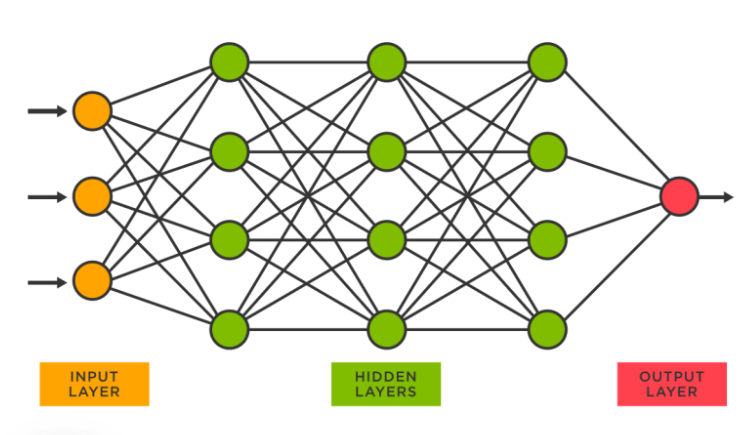

In [ ]:
# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,689 (41.75 KB)

 Trainable params: 10,689 (41.75 KB)

 Non-trainable params: 0 (0.00 B)

### Compile
- optimizer : 경사하강법으로 w(가중치)값 수정
 - 종류: adam,adagrad,rmsprop,sgd.....
- loss(손실함수): mse(선형),binary_crossentropy(이진분류)
- metrics = 어떤 요소로 평가할지(loss,acc)

In [ ]:
###
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

### 모델 학습

In [ ]:
# fit(문제데이터(X),답지데이터(y),epochs)
h = model.fit(X,y,epochs=1000)

Epoch 1/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7046 - loss: 0.5777 
Epoch 2/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6981 - loss: 0.5423  
Epoch 3/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7221 - loss: 0.5451 
Epoch 4/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7078 - loss: 0.5641 
Epoch 5/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7036 - loss: 0.5793 
Epoch 6/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7260 - loss: 0.5780 
Epoch 7/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7089 - loss: 0.5657 
Epoch 8/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7534 - loss: 0.5269  
Epoch 9/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7746 - loss: 0.5341 
Epoch 10/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7254 - loss: 0.5677 
Epoch 11/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6703 - loss: 0.5939 
Epoch 12/1000
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7183 - loss: 0.5443 
Epoch 13/10

In [ ]:
# Epoch 1/1000
# 14/14 ━━4s 62ms/step - acc: 0.4710 - loss: 5.8649
# Epoch 500/1000
# 14/14 ━━ 0s 2ms/step - acc: 0.6926 - loss: 0.5828
# Epoch 1000/1000
# 14/14 ━━ 0s 3ms/step - acc: 0.7230 - loss: 0.5554
# Epoch 2000/2000
# 14/14 ━━ 0s 2ms/step - acc: 0.8057 - loss: 0.4439

### 학습결과 시각화

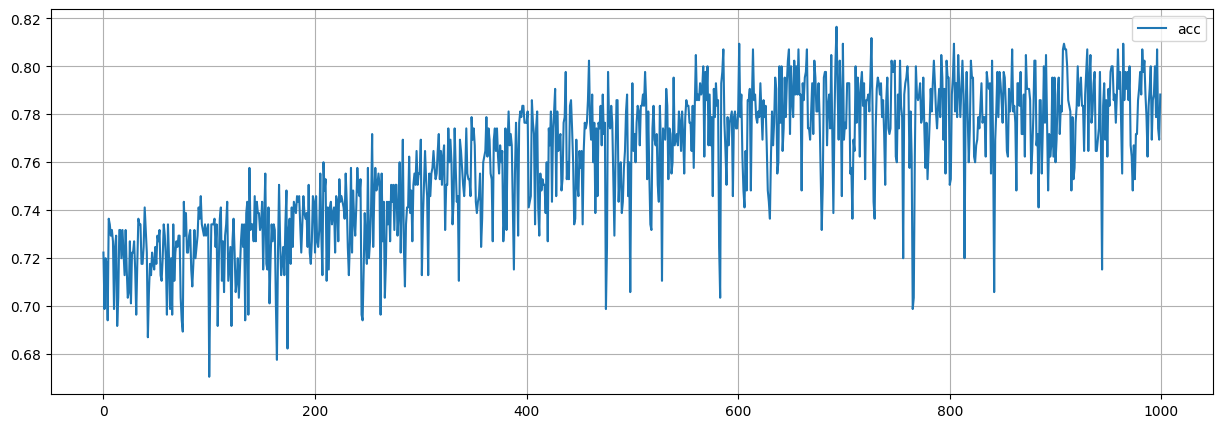

In [ ]:
# 학습결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(h.history['acc'], label='acc')
plt.grid() # 격자무늬
plt.legend() # 범례

### 모델 예측

In [ ]:
X[1] # 실제학습시킨 2번째 데이터

array([660.  ,   3.67,   3.  ])

In [ ]:
y[1]

1

In [ ]:
# 예측(predict)
예측 = np.array([[700,3.5,2]])
result = model.predict(예측)
print(result)

if result > 0.5:
  print('합격')
else:
  print('불합격')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.66275]]
합격
